In [1]:
import gc
import scanit
import torch
import random
import scanpy as sc
import pandas as pd
import anndata
import numpy as np
from scipy import sparse
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.cluster import SpectralClustering, KMeans
import matplotlib.pyplot as plt
import stlearn as st
from pathlib import Path

### **Cerebellum**

In [2]:
sp_datadir = './data/slideseq-mouse-cerebellum'

In [3]:
pts = np.loadtxt(sp_datadir+"/positions.csv")
X_sp = sparse.load_npz(sp_datadir+"/expression.npz")
X_sp = X_sp.toarray()
genes_sp = np.loadtxt(sp_datadir+"/genes.txt", dtype = str)
adata = anndata.AnnData(X=X_sp, var=pd.DataFrame(index=genes_sp))
adata.obsm['spatial'] = pts

In [4]:
adata.shape

(24847, 18906)

In [4]:
n_sv_genes = 3000
adata_sp = adata.copy()
sc.pp.normalize_total(adata_sp)
df_somde = pd.read_csv('./data/slideseq-mouse-cerebellum/somde_result.csv')
sv_genes = list( df_somde['g'].values[:n_sv_genes] )
adata_sp = adata_sp[:, sv_genes]
sc.pp.log1p(adata_sp)
sc.pp.scale(adata_sp)

In [29]:
scanit.tl.spatial_graph(adata_sp, method='alpha shape', alpha_n_layer=2, knn_n_neighbors=5)
scanit.tl.spatial_representation(adata_sp, n_h=30, n_epoch=2000, lr=0.001, device='cuda', n_consensus=1, projection='mds', 
    python_seed=0, torch_seed=0, numpy_seed=0)

Epoch: 000, Loss: 1.3995
Epoch: 500, Loss: 0.0013
Epoch: 1000, Loss: 0.0013
Epoch: 1500, Loss: 0.0002
Epoch: 1999, Loss: 0.0001


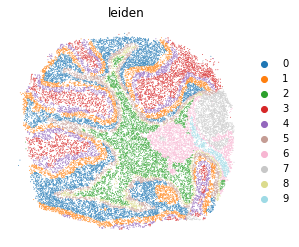

In [37]:
sc.pp.neighbors(adata_sp, use_rep='X_scanit', n_neighbors=15)
sc.tl.leiden(adata_sp, resolution=0.4)
sc.pl.spatial(adata_sp, spot_size=20, color='leiden', frameon=False, palette='tab20')

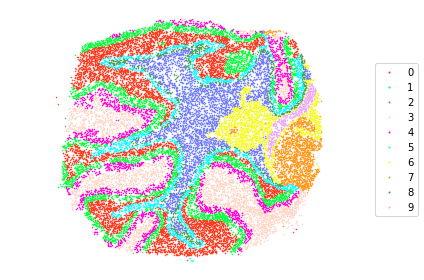

In [38]:
import plotly
pts = adata_sp.obsm['spatial']
color_list = plotly.colors.qualitative.Light24
labels_pred = np.array( adata_sp.obs['leiden'], int )
labels = list(set(labels_pred))
labels = list(np.sort(labels))
for j in range(len(labels)):
    label = labels[j]
    idx = np.where(labels_pred == label)[0]
    plt.scatter(pts[idx,0], pts[idx,1], c=color_list[j], label = label, s=0.25)
plt.axis('equal')
plt.axis('off')
plt.legend(markerscale=2, loc='center left', bbox_to_anchor=(1,0.5))
plt.tight_layout()
plt.savefig('./figures/slideseq-mouse-cerebellum.pdf', bbox_inches='tight')

### **Hippocampus**

In [5]:
sp_datadir = './data/slideseq-mouse-hippocampus'

In [6]:
pts = np.loadtxt(sp_datadir+"/positions.csv")
X_sp = sparse.load_npz(sp_datadir+"/expression.npz")
X_sp = X_sp.toarray()
genes_sp = np.loadtxt(sp_datadir+"/genes.txt", dtype = str)
adata = anndata.AnnData(X=X_sp, var=pd.DataFrame(index=genes_sp))
adata.obsm['spatial'] = pts

In [7]:
adata.shape

(38666, 19869)

In [5]:
n_sv_genes = 3000
adata_sp = adata.copy()
sc.pp.normalize_total(adata_sp)
df_somde = pd.read_csv('./data/slideseq-mouse-hippocampus/somde_result.csv')
sv_genes = list( df_somde['g'].values[:n_sv_genes] )
adata_sp = adata_sp[:, sv_genes]
sc.pp.log1p(adata_sp)
sc.pp.scale(adata_sp)

In [26]:
scanit.tl.spatial_graph(adata_sp, method='alpha shape', alpha_n_layer=2, knn_n_neighbors=15)
scanit.tl.spatial_representation(adata_sp, n_h=30, n_epoch=5000, lr=0.001, device='cuda', n_consensus=1, projection='mds', 
    python_seed=0, torch_seed=0, numpy_seed=0)

Epoch: 000, Loss: 1.4013
Epoch: 500, Loss: 0.0049
Epoch: 1000, Loss: 0.0029
Epoch: 1500, Loss: 0.0023
Epoch: 2000, Loss: 0.0012
Epoch: 2500, Loss: 0.0019
Epoch: 3000, Loss: 0.0019
Epoch: 3500, Loss: 0.0019
Epoch: 4000, Loss: 0.0009
Epoch: 4500, Loss: 0.0022
Epoch: 4999, Loss: 0.0041


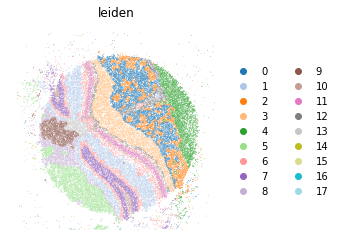

In [27]:
sc.pp.neighbors(adata_sp, use_rep='X_scanit', n_neighbors=15)
sc.tl.leiden(adata_sp, resolution=0.5)
sc.pl.spatial(adata_sp, spot_size=20, color='leiden', frameon=False, palette='tab20')

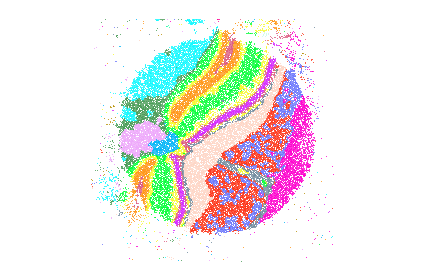

In [31]:
import plotly
pts = adata_sp.obsm['spatial']
color_list = plotly.colors.qualitative.Light24
labels_pred = np.array( adata_sp.obs['leiden'], int )
labels = list(set(labels_pred))
labels = list(np.sort(labels))
for j in range(len(labels)):
    label = labels[j]
    idx = np.where(labels_pred == label)[0]
    plt.scatter(pts[idx,0], pts[idx,1], c=color_list[j % 24], label = label, s=1, linewidth=0)
plt.axis('equal')
plt.axis('off')
# plt.legend(markerscale=2, loc='center left', bbox_to_anchor=(1,0.5))
plt.tight_layout()
plt.savefig('./figures/slideseq-mouse-hippocampus.pdf', bbox_inches='tight')

### **Olfactory Bulb**

In [8]:
sp_datadir = './data/slideseq-mouse-olfactory_bulb'

In [9]:
pts = np.loadtxt(sp_datadir+"/positions.csv")
X_sp = sparse.load_npz(sp_datadir+"/expression.npz")
X_sp = X_sp.toarray()
genes_sp = np.loadtxt(sp_datadir+"/genes.txt", dtype = str)
adata = anndata.AnnData(X=X_sp, var=pd.DataFrame(index=genes_sp))
adata.obsm['spatial'] = pts

In [10]:
adata.shape

(26316, 18838)

In [8]:
n_sv_genes = 3000
adata_sp = adata.copy()
sc.pp.normalize_total(adata_sp)
df_somde = pd.read_csv('./data/slideseq-mouse-olfactory_bulb/somde_result.csv')
sv_genes = list( df_somde['g'].values[:n_sv_genes] )
adata_sp = adata_sp[:, sv_genes]
sc.pp.log1p(adata_sp)
sc.pp.scale(adata_sp)

In [9]:
scanit.tl.spatial_graph(adata_sp, method='alpha shape', alpha_n_layer=2, knn_n_neighbors=15)
scanit.tl.spatial_representation(adata_sp, n_h=30, n_epoch=5000, lr=0.001, device='cuda', n_consensus=1, projection='mds', 
    python_seed=0, torch_seed=0, numpy_seed=0)

Epoch: 000, Loss: 1.4012
Epoch: 500, Loss: 0.0021
Epoch: 1000, Loss: 0.0008
Epoch: 1500, Loss: 0.0003
Epoch: 2000, Loss: 0.0027
Epoch: 2500, Loss: 0.0027
Epoch: 3000, Loss: 0.0014
Epoch: 3500, Loss: 0.0027
Epoch: 4000, Loss: 0.0041
Epoch: 4500, Loss: 0.0013
Epoch: 4999, Loss: 0.0013


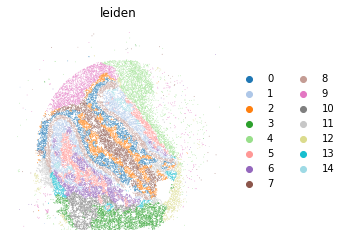

In [10]:
sc.pp.neighbors(adata_sp, use_rep='X_scanit', n_neighbors=15)
sc.tl.leiden(adata_sp, resolution=0.5)
sc.pl.spatial(adata_sp, spot_size=20, color='leiden', frameon=False, palette='tab20')

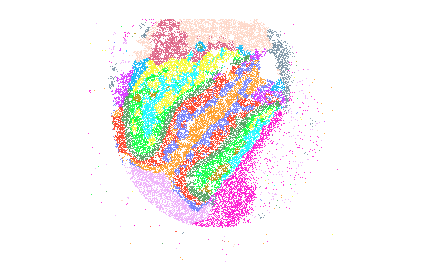

In [11]:
import plotly
pts = adata_sp.obsm['spatial']
color_list = plotly.colors.qualitative.Light24
labels_pred = np.array( adata_sp.obs['leiden'], int )
labels = list(set(labels_pred))
labels = list(np.sort(labels))
for j in range(len(labels)):
    label = labels[j]
    idx = np.where(labels_pred == label)[0]
    plt.scatter(pts[idx,0], pts[idx,1], c=color_list[j % 24], label = label, s=1, linewidth=0)
plt.axis('equal')
plt.axis('off')
# plt.legend(markerscale=2, loc='center left', bbox_to_anchor=(1,0.5))
plt.tight_layout()
plt.savefig('./figures/slideseq-mouse-olfactory_bulb.pdf', bbox_inches='tight')